## Exploration

In [1]:
import numpy as np
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


train.csv shape is  (139753, 9)
test.csv shape is  (17470, 2)

        Id   ProductId          UserId  HelpfulnessNumerator  \
0   195370  1890228583  A3VLX5Z090RQ0V                     1   
1  1632470  B00BEIYSL4   AUDXDMFM49NGY                     0   
2     9771  0767809335  A3LFIA97BUU5IE                     3   
3   218855  6300215792  A1QZM75342ZQVQ                     1   
4   936225  B000B5XOZW   ANM2SCEUL3WL1                     1   

   HelpfulnessDenominator        Time  \
0                       2  1030838400   
1                       1  1405036800   
2                      36   983750400   
3                       1  1394841600   
4                       1  1163721600   

                                             Summary  \
0                        An Unexplained Anime Review   
1                                         not great.   
2                    Technical problem with this DVD   
3                          Heeeeyyyyy LAAAAADEEE!!!!   
4  Herzog the Great Trave

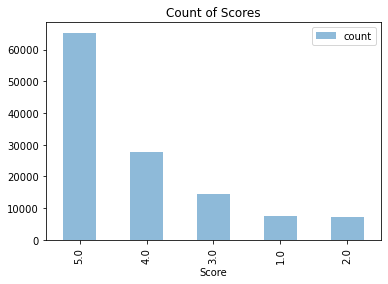

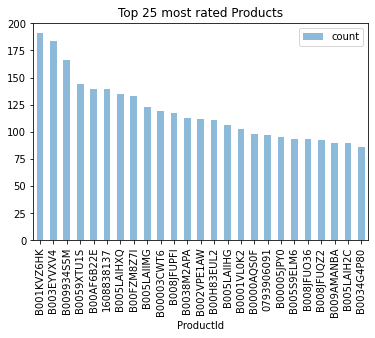

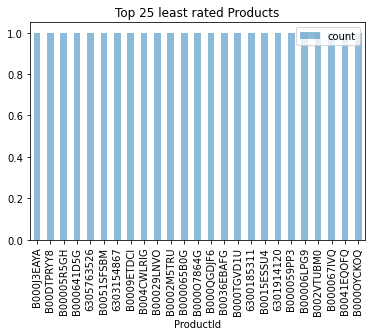

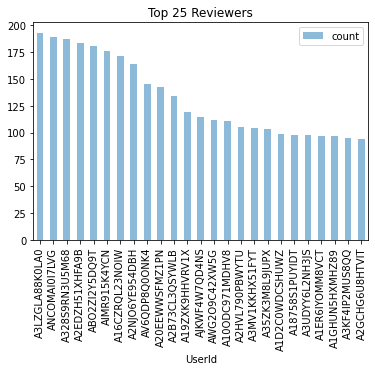

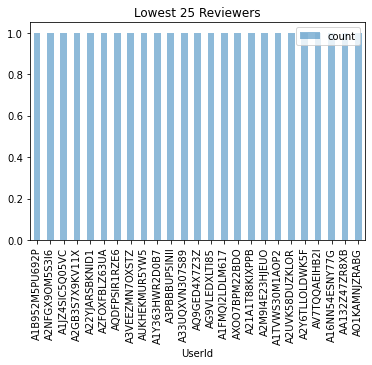

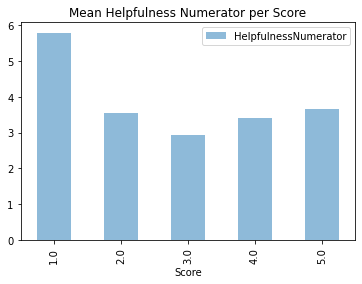

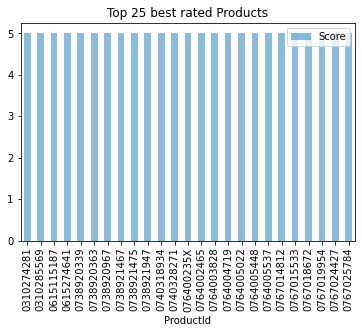

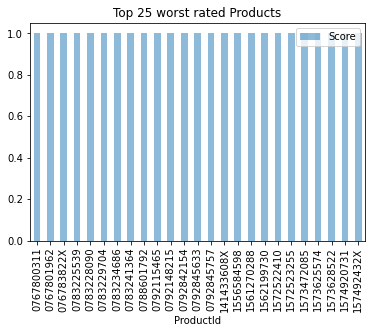

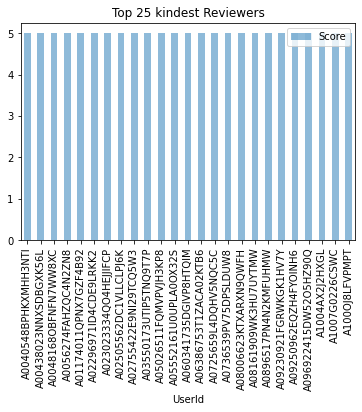

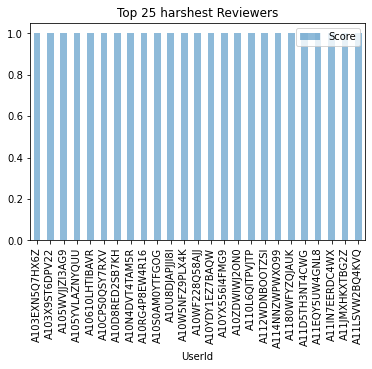

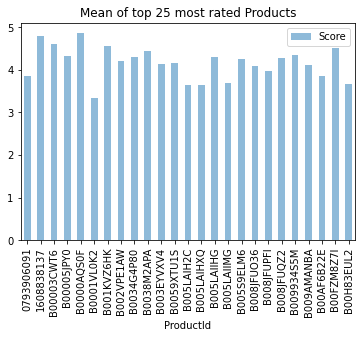

In [2]:

import matplotlib.pyplot as plt

trainingSet = pd.read_csv("./data/train.csv")
testingSet = pd.read_csv("./data/test.csv")

print("train.csv shape is ", trainingSet.shape)
print("test.csv shape is ", testingSet.shape)

print()

print(trainingSet.head())
print()
print(testingSet.head())

print()

print(trainingSet.describe())

trainingSet['Score'].value_counts().plot(kind='bar', legend=True, alpha=.5)
plt.title("Count of Scores")
plt.show()

trainingSet['ProductId'].value_counts().nlargest(25).plot(kind='bar', legend=True, alpha=.5)
plt.title("Top 25 most rated Products")
plt.show()

trainingSet['ProductId'].value_counts().nsmallest(25).plot(kind='bar', legend=True, alpha=.5)
plt.title("Top 25 least rated Products")
plt.show()

trainingSet['UserId'].value_counts().nlargest(25).plot(kind='bar', legend=True, alpha=.5)
plt.title("Top 25 Reviewers")
plt.show()

trainingSet['UserId'].value_counts().nsmallest(25).plot(kind='bar', legend=True, alpha=.5)
plt.title("Lowest 25 Reviewers")
plt.show()

trainingSet[['Score', 'HelpfulnessNumerator']].groupby('Score').mean().plot(kind='bar', legend=True, alpha=.5)
plt.title("Mean Helpfulness Numerator per Score")
plt.show()

trainingSet[['Score', 'ProductId']].groupby('ProductId').mean().nlargest(25, 'Score').plot(kind='bar', legend=True, alpha=.5)
plt.title("Top 25 best rated Products")
plt.show()

trainingSet[['Score', 'ProductId']].groupby('ProductId').mean().nsmallest(25, 'Score').plot(kind='bar', legend=True, alpha=.5)
plt.title("Top 25 worst rated Products")
plt.show()

trainingSet[['Score', 'UserId']].groupby('UserId').mean().nlargest(25, 'Score').plot(kind='bar', legend=True, alpha=.5)
plt.title("Top 25 kindest Reviewers")
plt.show()

trainingSet[['Score', 'UserId']].groupby('UserId').mean().nsmallest(25, 'Score').plot(kind='bar', legend=True, alpha=.5)
plt.title("Top 25 harshest Reviewers")
plt.show()

trainingSet[trainingSet['ProductId'].isin(trainingSet['ProductId'].value_counts().nlargest(25).index.tolist())][['Score', 'ProductId']].groupby('ProductId').mean().plot(kind='bar', legend=True, alpha=.5)
plt.title("Mean of top 25 most rated Products")
plt.show()

In [3]:
trainingSet.head()

,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Time,Summary,Text,Score
0,195370,1890228583,A3VLX5Z090RQ0V,1,2,1030838400,An Unexplained Anime Review,I was very anxious to see the Uncut version of...,2.0
1,1632470,B00BEIYSL4,AUDXDMFM49NGY,0,1,1405036800,not great.,Movie was okay...not great.,3.0
2,9771,0767809335,A3LFIA97BUU5IE,3,36,983750400,Technical problem with this DVD,"Like the Dinosaur Collector's Edition DVD, thi...",1.0
3,218855,6300215792,A1QZM75342ZQVQ,1,1,1394841600,Heeeeyyyyy LAAAAADEEE!!!!,"Come on, now..... this has to be, by far, the...",5.0
4,936225,B000B5XOZW,ANM2SCEUL3WL1,1,1,1163721600,Herzog the Great Traveler of both natural and ...,I've always been a great admirer of Herzog's o...,4.0


In [4]:
print(len(trainingSet['UserId'].unique()))
print(len(trainingSet['ProductId'].unique()))
selected_row = trainingSet[trainingSet['ProductId'] == "1890228583"]
summary = selected_row['Summary']
print(summary)

65269
34026
0                            An Unexplained Anime Review
1327      A very nice OVA with a somewhat familiar story
96196                                  A Little Too Much
118287                            Director's Cut version
Name: Summary, dtype: object


In [6]:
testingSet.head()

,Id,Score
0,786781,NaN
1,17153,NaN
2,1557328,NaN
3,1242666,NaN
4,1359242,NaN


In [7]:
sample = pd.read_csv('./data/sample.csv')
sample.head()

,Id,Score
0,786781,4.0
1,17153,4.0
2,1557328,4.0
3,1242666,4.0
4,1359242,4.0


## Feature Extraction

In [7]:
import nltk 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [54]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import  WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re
lemmatizer = WordNetLemmatizer()
def preprocess(text):
    text = str(text)
    words = word_tokenize(text)
    words = [word.lower() for word in words if word.isalnum()]
    words = [word for word in words if word not in stopwords.words('english')]
    words = [lemmatizer.lemmatize(word) for word in words]
    words = " ".join(words)
    return words
    
def process(df):
    # This is where you can do all your processing

    df['Helpfulness'] = df['HelpfulnessNumerator'] / df['HelpfulnessDenominator']
    df['Helpfulness'] = df['Helpfulness'].fillna(0)

    df['ReviewLength'] = df.apply(lambda row : len(row['Text'].split()) if type(row['Text']) == str else 0, axis = 1)
    df['Summary'] = df['Summary'].apply(preprocess)
    df['Text'] = df['Text'].apply(preprocess)

    return df

# Load the dataset
trainingSet = pd.read_csv("./data/train.csv")

# Process the DataFrame
train_processed = process(trainingSet)

# Load test set
# submissionSet = pd.read_csv("./data/test.csv")

# # Merge on Id so that the test set can have feature columns as well
# testX= pd.merge(train_processed, submissionSet, left_on='Id', right_on='Id')
# testX = testX.drop(columns=['Score_x'])
# testX = testX.rename(columns={'Score_y': 'Score'})

# # The training set is where the score is not null
# trainX =  train_processed[train_processed['Score'].notnull()]

# # Save the datasets with the new features for easy access later
# testX.to_csv("./data/X_test.csv", index=False)
# trainX.to_csv("./data/X_train.csv", index=False)


KeyboardInterrupt: 

In [5]:
trainX = pd.read_csv('data/X_train.csv')
testX = pd.read_csv('data/X_test.csv')

In [6]:
trainX.shape

(122283, 11)

In [7]:
import re
def preprocess_2(text):
    text = str(text)
    text = re.sub(r'[0-9]', "", text)
    return text

In [8]:
trainX['Summary'] = trainX['Summary'].apply(preprocess_2)
trainX['Text'] = trainX['Text'].apply(preprocess_2)

In [9]:
word_counts_sum = Counter()
for sentence in trainX['Summary']:
    words = sentence.split()
    word_counts_sum.update(words)

In [10]:
word_counts_text = Counter()
for sentence in trainX['Text']:
    words = sentence.split()
    word_counts_text.update(words)

In [12]:
top_words_summary = word_counts_sum.most_common(100)

In [14]:
top_words_text = word_counts_text.most_common(200)

In [15]:
def presence_of_top_words_summary(summary):
    word_presence = {word[0]: summary.split().count(word[0]) for word in top_words_summary}
    return pd.Series(word_presence)

feature_vector_sum = trainX['Summary'].apply(presence_of_top_words_summary)

In [ ]:
def presence_of_top_words_text(text):
    word_presence = {word[0]: text.split().count(word[0]) for word in top_words_text}
    return pd.Series(word_presence)

feature_vector_text = trainX['Text'].apply(presence_of_top_words_text)

In [30]:
feature_vector_text.sum(axis=1).head(20)

0     50
1      2
2      5
3     24
4     28
5      4
6     28
7     44
8     10
9     49
10    10
11     3
12    27
13    19
14    24
15    61
16    26
17    59
18    16
19     9
dtype: int64

In [31]:
feature_vector_text.head()

,movie,film,one,like,good,time,great,story,get,would,...,said,anything,although,home,anyone,looking,rather,reason,night,high
0,4,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,1,3,2,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
feature_vectors = pd.concat([feature_vector_sum, feature_vector_text], axis=1)

In [33]:
feature_vectors.head()

,movie,great,good,film,best,one,love,classic,dvd,fun,...,said,anything,although,home,anyone,looking,rather,reason,night,high
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [249]:
# vectorizer_sum = CountVectorizer(ngram_range=(3,3), stop_words='english', max_features=10, min_df=1)
# trigram_vec_sum = vectorizer_sum.fit_transform(train_processed['Summary'])
# vectorizer_text = CountVectorizer(ngram_range=(3,3), stop_words='english', max_features=20, min_df=1)
# trigram_vec_text = vectorizer_text.fit_transform(train_processed['Text'])

In [250]:
# trigram_vec_sum[0]

<1x10 sparse matrix of type '<class 'numpy.int64'>'
	with 0 stored elements in Compressed Sparse Row format>

In [251]:
# trigram_sum = pd.DataFrame(trigram_vec_sum.toarray(), columns=vectorizer_sum.get_feature_names_out())
# trigram_text = pd.DataFrame(trigram_vec_text.toarray(), columns=vectorizer_text.get_feature_names_out())

In [256]:
# trigram_fv = pd.concat([trigram_sum, trigram_text], axis=1)

In [258]:
# feature_vectors_new = pd.concat([feature_vectors, trigram_fv], axis=1)

In [125]:
#save the created feature vectors
# feature_vectors.to_csv('feature_vectors.csv')

In [12]:
# new_train_df = train_processed[['Text', 'Summary', 'ReviewLength', 'Score']]

In [35]:
X = np.array(feature_vectors)
y = trainX['Score']

In [361]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=75)
# X_pca = pca.fit_transform(X)

In [362]:
# from imblearn.over_sampling import SMOTE
# smote = SMOTE()
# x_resampled, y_resampled = smote.fit_resample(X_pca, y)

In [363]:
# x_resampled[2]

array([-2.03751288, -0.6689654 ,  0.19282634, -0.0425706 , -0.55357526,
        0.55876035,  0.49272148, -0.16632269,  0.60191345,  0.02350973,
       -0.6173503 ,  0.74022984, -0.15670812,  0.02665202,  0.07091311,
       -0.38191589, -0.01233441,  0.19643278,  0.01280085, -0.21630231,
        0.07364444,  0.08461656, -0.08519906, -0.0955197 ,  0.16269584,
       -0.07899067,  0.08934624,  0.02690389, -0.12535353, -0.18781204,
       -0.03147658, -0.0530105 ,  0.00599279,  0.07211688,  0.08010335,
       -0.05003745,  0.14932972,  0.11741827,  0.13185609, -0.27545194,
        0.05226489, -0.0940229 , -0.16404111,  0.20968187,  0.17817799,
        0.10257856, -0.09029925, -0.11906252, -0.05036038, -0.01342572,
       -0.16911196,  0.14103693,  0.13521983, -0.00737557,  0.2519205 ,
       -0.22513762, -0.18223877,  0.18111344, -0.09690244,  0.12907454,
        0.30612278, -0.18014417,  0.16429056,  0.12439179,  0.22736009,
        0.11151435,  0.12959841, -0.07493144,  0.167408  , -0.00

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [26]:
# tfidf_text = TfidfVectorizer(max_features=20000)
# tfidf_summary = TfidfVectorizer(max_features=20000)

In [27]:
# x_train_text = x_train['Text']
# x_test_text = x_test['Text']
# x_train_text_tfidf = tfidf_text.fit_transform(x_train_text)
# x_test_text_tfidf = tfidf_text.transform(x_test_text)

In [28]:
# x_train_summary = x_train['Summary']
# x_test_summary = x_test['Summary']
# x_train_summary_tfidf = tfidf_summary.fit_transform(x_train_summary)
# x_test_summary_tfidf = tfidf_summary.transform(x_test_summary)

In [18]:
# import scipy
# print(x_train_text_tfidf.shape)
# print(x_train_summary_tfidf.shape)
# new_xtrain_features = scipy.sparse.hstack([x_train_text_tfidf, x_train_summary_tfidf])
# new_xtest_features = scipy.sparse.hstack([x_test_text_tfidf, x_test_summary_tfidf])
# print(new_xtrain_features.shape)

(97826, 10000)
(97826, 10000)
(97826, 20000)


In [ ]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=5000)
# new_xtrain_features = 

In [38]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [39]:
print(label_encoder.classes_)
print(label_encoder.transform(label_encoder.classes_))

[1. 2. 3. 4. 5.]
[0 1 2 3 4]


## Creating your model

Accuracy on testing set =  0.5821237273582206
RMSE on testing set =  1.2502606343971694


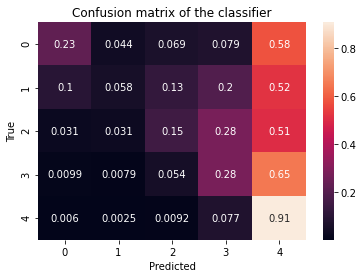

In [40]:
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, accuracy_score

# Learn the model
# model = KNeighborsClassifier(n_neighbors=20).fit(new_xtrain_features, y_train)
model = XGBClassifier().fit(x_train, y_train_encoded)
# model = RandomForestClassifier().fit(x_train, y_train_encoded)
# n_folds  = 5
# kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Evaluate your model on the testing set
Y_test_predictions = model.predict(x_test)
print("Accuracy on testing set = ", accuracy_score(y_test_encoded, Y_test_predictions))
print("RMSE on testing set = ", mean_squared_error(y_test_encoded, Y_test_predictions)**0.5)

# Plot a confusion matrix
cm = confusion_matrix(y_test_encoded, Y_test_predictions, normalize='true')
sns.heatmap(cm, annot=True)
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# # pickle model - saves it so you can load it later
# with open('xgb_20_model.obj', 'wb') as f:
#         pickle.dump(model, f)
# # to load pickled model: 
# # with open('filename', 'rb') as f:
# #    model = pickle.load(f)


In [343]:
# Define the scoring metric for evaluation (accuracy in this case)
scoring = make_scorer(accuracy_score)

# Perform cross-validation and compute accuracy scores for each fold
cv_scores = cross_val_score(model, x_train, y_train_encoded, cv=kf, scoring=scoring)

# Print the accuracy scores for each fold
for fold, accuracy in enumerate(cv_scores, start=1):
    print(f"Accuracy on fold {fold}: {accuracy}")

# Calculate and print the mean accuracy across all folds
mean_accuracy = cv_scores.mean()
print(f"Mean accuracy across all folds: {mean_accuracy}")

Accuracy on fold 1: 0.5466625779413268
Accuracy on fold 2: 0.5462305136723742
Accuracy on fold 3: 0.5404037822642473
Accuracy on fold 4: 0.5412726808075645
Accuracy on fold 5: 0.5361615129056989
Mean accuracy across all folds: 0.5421462135182423


## Create the Kaggle submission

In [269]:
X_submission = pd.read_csv("./data/X_test.csv")
X_submission['Summary'] = X_submission['Summary'].apply(preprocess)
X_submission['Text'] = X_submission['Text'].apply(preprocess)
X_submission['Summary'] = X_submission['Summary'].apply(preprocess_2)
X_submission['Text'] = X_submission['Text'].apply(preprocess_2)
test_feature_vector_sum = X_submission['Summary'].apply(presence_of_top_words_summary)
test_feature_vector_text = X_submission['Text'].apply(presence_of_top_words_text)
test_feature_vectors = pd.concat([test_feature_vector_sum, test_feature_vector_text], axis=1)

In [270]:
trigram_vec_sum = vectorizer_sum.transform(X_submission['Summary'])
trigram_vec_text = vectorizer_text.transform(X_submission['Text'])
trigram_sum = pd.DataFrame(trigram_vec_sum.toarray(), columns=vectorizer_sum.get_feature_names_out())
trigram_text = pd.DataFrame(trigram_vec_text.toarray(), columns=vectorizer_text.get_feature_names_out())
test_feature_vectors_new = pd.concat([test_feature_vectors, trigram_sum, trigram_text], axis=1)

In [308]:
X_submission_processed = pca.transform(test_feature_vectors_new)
X_submission_processed.shape

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


(17470, 75)

In [320]:
y_preds = model.predict(X_submission_processed)
y_preds_encoded = label_encoder.inverse_transform(y_preds)
X_submission['Score'] = y_preds_encoded
submission = X_submission[['Id', 'Score']]
submission.to_csv("./data/submission.csv", index=False)

In [1]:
submission['Score'].value_counts()

NameError: name 'submission' is not defined

Now you can upload the `submission.csv` to kaggle